# Ejemplo de uso

## Importar el paquete

In [2]:
# Importar el paquete (puede instalarse via 'pip install dcVirtualSpinning')
# alternativamente, como aqui, es posible dar la ubicacion del repo en el directorio local 
import sys 
sys.path.insert(0, '/home/dancab/git/dcVirtualSpinning')
import VirtualSpinning as vs

In [16]:
# Importar otros paquetes
import numpy as np
from matplotlib import pyplot as plt
import os

## Estudiar la curva de una fibra

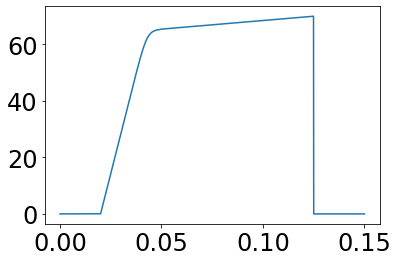

In [4]:
# Seteo de parametros constitutivos
parcon = {
    'Et':2.9e3,  # Modulo elastico a la traccion de fibras reclutadas [MPa]
    'EbEt': 1.0e-3,  # Ratio de modulo elastico de fibras enruladas respecto de Et
    'doteps': 1.0e-8,  # Parametro de velocidad de plastificacion [1/seg]
    's0': 4.5,  # Umbral de plasticidad [Mpa]
    'nh': 1.0,  # Coeficiente de endurecimiento por deformacion
    'tenbrk': 70.0  # Tension de rotura
}
# Crear objeto fibra
fib = vs.Fibra(**parcon, lamr=1.02)  # lamr es el valor de tortuosidad inicial
# Setear parametros de deformacion temporales
dt = 0.01  # delta t
lamf = 1.15  # valor final de elongacion
dotlam = 0.01  # velocidad de deformacion
# Obtener curva de traccion uniaxial
out = fib.traccionar(dt, dotlam, lamf)
deformacion = out['eps']
tension = out['ten']
# Graficar
fig, ax = plt.subplots()
ax.plot(deformacion, tension)

## Generar Mallas

archivo:  /home/dancab/git/dcVirtualSpinning/Docs/malla.txt


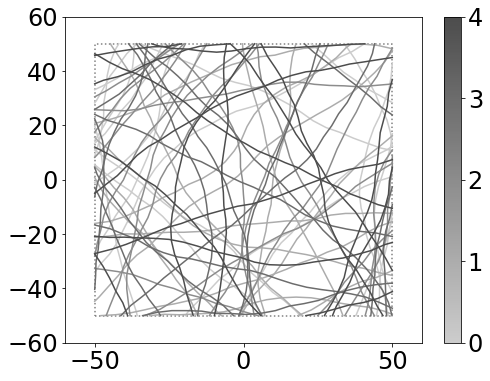

In [30]:
# Setear parametros geometricos de una malla
meshParams = {
    'L': 100.,
    'D': 1.,
    'vf': 0.1,
    'ls': 5.,
    'dth': 10. * 3.1416 / 180.,
    'nc': 5,
    'fdo': None,
    'nm': 1
}
# Generar objeto malla
mc = vs.Mallacom(**meshParams)
mc.make_malla()
# Guardar en un archivo
carpeta = os.path.abspath('')
archivo = os.path.join(carpeta, 'malla.txt')
print('archivo: ', archivo)
mc.guardar_en_archivo(archivo)
# Graficar
fig, ax = plt.subplots(figsize=(8,6))
mc.marco.graficar(fig, ax) 
mc.pre_graficar_fibras(fig, ax, cby='capa', byn=True)

## Intersectar malla y simplificar
Para eso hacemos uso del repo de Fortran en: https://github.com/khawabonga/Nanofibrous_Mesh_Processor
Eso genera dos archivos nuevos: 
* 'Malla_i.txt': archivo con las intersecciones
* 'Malla_i_s.txt': archivo con las intersecciones y simplificado para resolver la parte mecanica
Tengo el ejecutable en esta carpeta asi que lo puedo utilizar desde aqui (la configuración se lee desde el archivo 'ConfigurationFile.txt' que también se encuentra en la carpeta):

In [31]:
import subprocess
out = subprocess.Popen(['./Nanofibrous_Mesh_Processor'],
                       stdout=subprocess.PIPE,
                       stderr=subprocess.PIPE,shell=True).communicate()

In [32]:
# Paso el out de bytes a ascii
out_ascii = out[0].decode('ascii')
# Y lo imprimo para ver lo que sucedio
for line in out_ascii.split('\n'):
    print(line)

 ---
 Instrucciones
 n:            2
 labels:            1           2
 ---
 * 1
 Intersectar                                                                                                             
 * 2
 Simplificar                                                                                                             
 ---
 Parametros constitutivos
           7
   4.0000000000000000        2900.0000000000000        1.0000000000000000E-003   1.0000000000000000E-008   4.5000000000000000        0.0000000000000000        90.000000000000000     
 ---
 Procesar interseccion
 Malla: malla.txt
 num_pasos_intsec:           10
 periodic_intsec:  T
 Leer malla, intersectar fibras y reescribir:
 Intersectando fibras
        1346
   1        2362
   2        2780
   3        2880
   4        2884
   5        2884

 Escribiendo malla intersectada
 Malla intersectada OK
 ---
 Procesar simplificar
 Malla: malla.txt
 Leer malla intersectada y generar malla simplificada:
 Contando el numero de

-
graficando interfibras
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% -


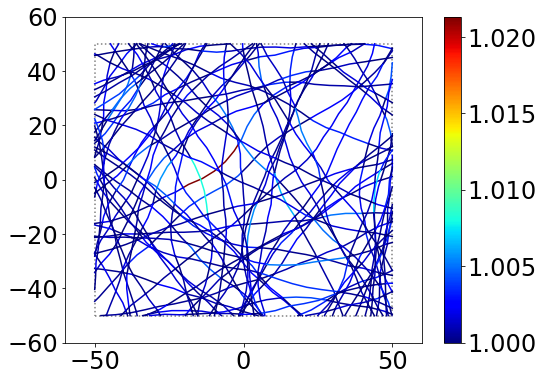

In [33]:
# Graficamos la malla intersectada
archivo = os.path.join(carpeta, 'malla_i.txt')
mi = vs.Mallacom.leer_de_archivo(archivo)
fig, ax = plt.subplots(figsize=(8,6))
mi.marco.graficar(fig, ax)
mi.pre_graficar_interfibras(fig, ax, color_por='lamr')
plt.show()

Pregraficando Mallasim
   0%   10%   20%   30%   40%   50%   60%   70%   80%   90%  100% 


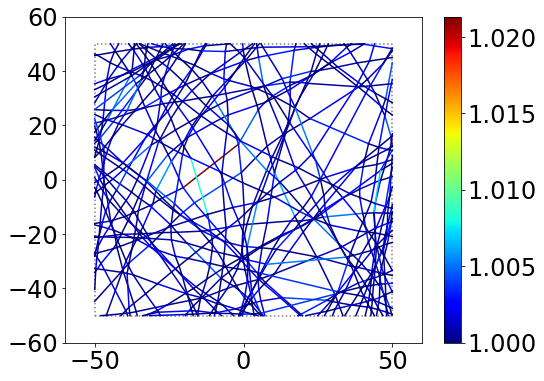

In [34]:
# Graficamos la malla simplificada
archivo = os.path.join(carpeta, 'malla_i_s.txt')
ms = vs.Mallasim.leer_de_archivo(archivo)
fig, ax = plt.subplots(figsize=(8,6))
ms.pre_graficar_bordes(fig, ax)
ms.pre_graficar(fig, ax, cby='lamr', cbar=True, plot_afin=False)